In [83]:
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Exploring the data

## Load the data

In [84]:
(x_train , y_train), (x_test , y_test ) = cifar10.load_data()

y_train_int=y_train
y_test_int = y_test

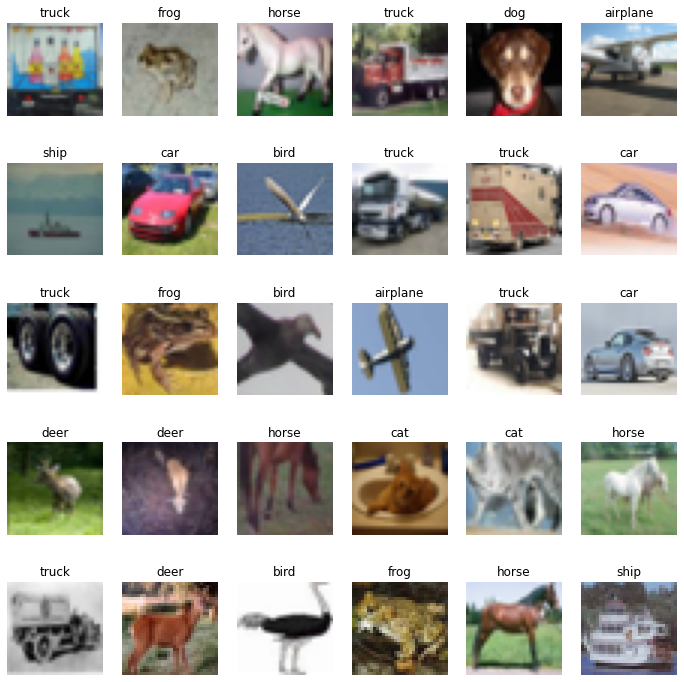

In [85]:
labels = ['airplane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

r_fig = 6
c_fig = 5

figure, axes = plt.subplots(c_fig, r_fig, figsize = (12,12))

axes = axes.ravel() 

n_train = len(x_train)

# random number from 0 to n_train
for i in np.arange(0, r_fig * c_fig): 

    index = np.random.randint(0, n_train)    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 12)
    axes[i].axis('off')

plt.subplots_adjust(hspace=.5)

# Data Preprocessing

In [86]:
# Normalize data set to (0 - 1) range
# pixel in image stored from 0 to 255 integer.

x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")
# I need to scale data between 0 & 1 
x_train = x_train / 255.0 #pixel
x_test  = x_test / 255.0


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


# Model Building

In [87]:
model = Sequential() 

model.add(Conv2D (32, (3, 3), padding="same", activation = "relu" , input_shape= ( 32, 32, 3)))# (R-G-B)
model.add(BatchNormalization())
model.add(Conv2D(32 , (3, 3), activation = "relu")) 
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 

model.add(Conv2D(64 , (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(64 , (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(128 , (3, 3), padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(128 , (3, 3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128 , activation = "relu", ))
model.add(Dropout(0.25)) 

model.add(Dense(10, activation = "softmax"))

In [88]:
metrics3 = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(
    loss = "categorical_crossentropy" , 
    optimizer = "adam" ,
    metrics = metrics3
)

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

# Train the model

In [90]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Data Augmentations

In [91]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [92]:
 x_train.shape[0]

50000

In [93]:
history = model.fit( train_generator 
          , epochs=30 
        , steps_per_epoch = steps_per_epoch
          , validation_data=(x_test, y_test ))

Epoch 1/30
1562/1562 [==============================] - 103s 66ms/step - loss: 1.6481 - accuracy: 0.4028 - precision: 0.5932 - recall: 0.1893 - val_loss: 1.5558 - val_accuracy: 0.4736 - val_precision: 0.5728 - val_recall: 0.3545
Epoch 2/30
1562/1562 [==============================] - 108s 69ms/step - loss: 1.2306 - accuracy: 0.5610 - precision: 0.7203 - recall: 0.3978 - val_loss: 0.9442 - val_accuracy: 0.6636 - val_precision: 0.7759 - val_recall: 0.5587
Epoch 3/30
1562/1562 [==============================] - 106s 68ms/step - loss: 1.0490 - accuracy: 0.6332 - precision: 0.7632 - recall: 0.5039 - val_loss: 0.9237 - val_accuracy: 0.6810 - val_precision: 0.7957 - val_recall: 0.5791
Epoch 4/30
1562/1562 [==============================] - 102s 65ms/step - loss: 0.9388 - accuracy: 0.6746 - precision: 0.7876 - recall: 0.5652 - val_loss: 0.9150 - val_accuracy: 0.6956 - val_precision: 0.7842 - val_recall: 0.6229
Epoch 5/30
1562/1562 [==============================] - 103s 66ms/step - loss: 0.871

# Model Evaluation

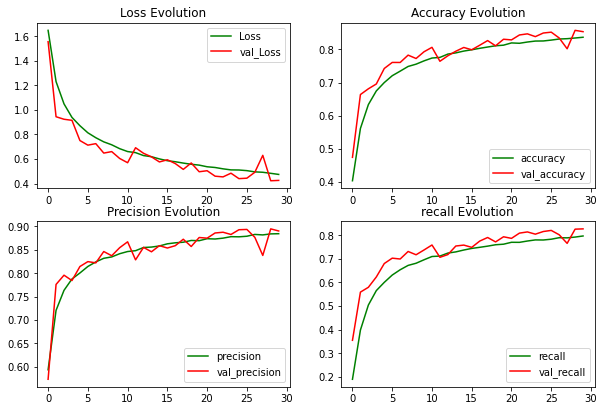

In [101]:
plt.figure(figsize=(10, 14))

# Loss model
plt.subplot(421)
plt.plot(history.history['loss'], label='Loss' , color='Green')
plt.plot(history.history['val_loss'], label='val_Loss' , color='Red')
plt.title('Loss Evolution')
plt.legend()

# Accuracy model
plt.subplot(422)
plt.plot(history.history['accuracy'], label='accuracy' ,color='Green')
plt.plot(history.history['val_accuracy'], label='val_accuracy' , color='Red')
plt.title('Accuracy Evolution')
plt.legend()

# Precision model
plt.subplot(423)
plt.plot(history.history['precision'], label='precision' ,color='Green')
plt.plot(history.history['val_precision'], label='val_precision' , color='Red')
plt.title('Precision Evolution')
plt.legend()

# recall model
plt.subplot(424)
plt.plot(history.history['recall'], label='recall' ,color='Green')
plt.plot(history.history['val_recall'], label='val_recall' , color='Red')
plt.title('recall Evolution')
plt.legend()

In [125]:
evaluation = model.evaluate(x_test, y_test , verbose=0)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

Test Accuracy : 85.39%


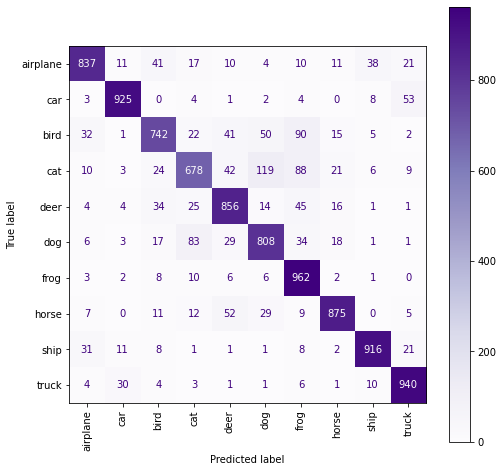

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       0.93      0.93      0.93      1000
           2       0.83      0.74      0.79      1000
           3       0.79      0.68      0.73      1000
           4       0.82      0.86      0.84      1000
           5       0.78      0.81      0.79      1000
           6       0.77      0.96      0.85      1000
           7       0.91      0.88      0.89      1000
           8       0.93      0.92      0.92      1000
           9       0.89      0.94      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [126]:
#Evaluate the accuracy of a classification
y_pred = model.predict_classes(x_test) #multiclasses 
cm = confusion_matrix(y_test_int, y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

figure2, axes2  = plt.subplots(figsize=(8, 8))
display = display.plot(xticks_rotation='vertical', ax=axes2,cmap='Purples')

plt.show()

print(classification_report(y_test_int, y_pred))

# Save model

In [127]:
model.save("final_model_imgClass")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_model_imgClass\assets


# Testing

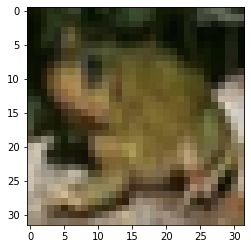

In [131]:
img1 = x_test[333]
plt.imshow(img1)

In [132]:
y_test[333]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [135]:
model.predict_classes(img1.reshape(1, 32, 32, 3))
#labels = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

array([6], dtype=int64)

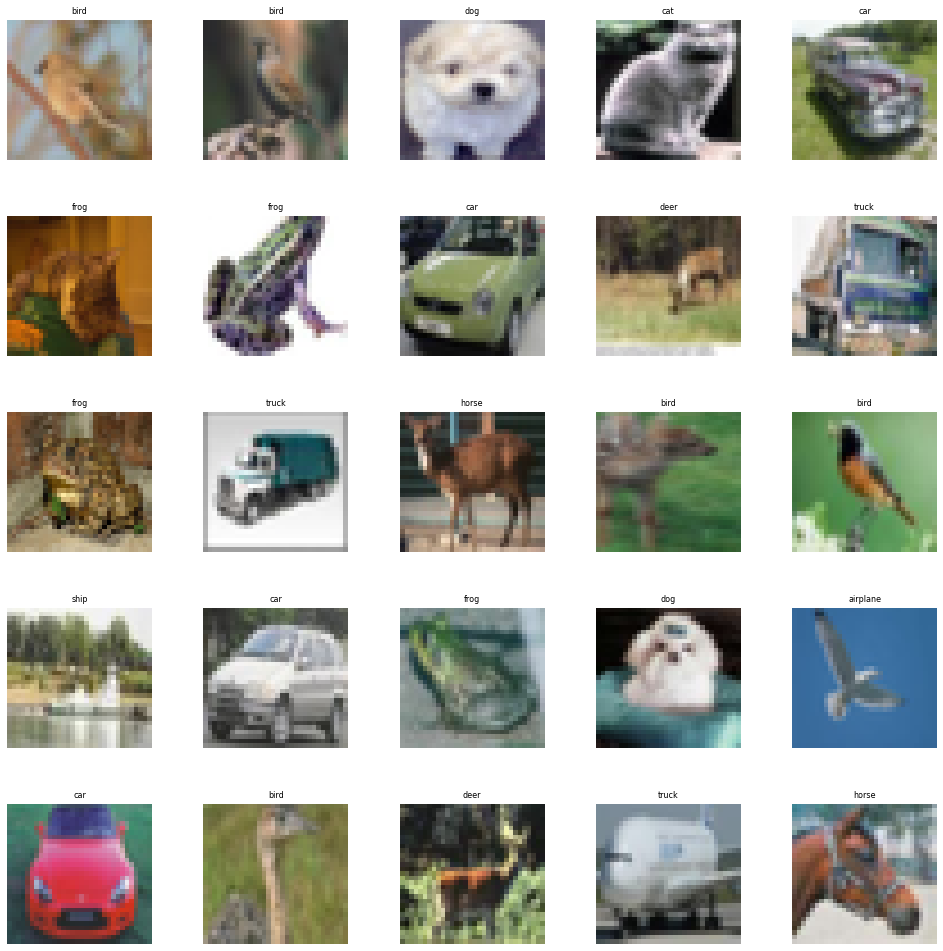

In [136]:
r_fig = 5
c_fig = 5

fig, axes = plt.subplots(c_fig, r_fig, figsize = (17,17))
axes = axes.ravel() 
n_test = len(x_test)

#random number from 0 to n_train
for i in np.arange(0, r_fig * c_fig):  

    index = np.random.randint(0, n_test)    
    axes[i].imshow(x_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [143]:
img2 = image.load_img("car.jpg" , target_size=(32,32))
image_to_test = image.img_to_array(img2) /255 
list_of_images = np.expand_dims(image_to_test, axis=0)

result = model.predict(list_of_images)

predict = result[0]

labels_class = int(np.argmax(predict))


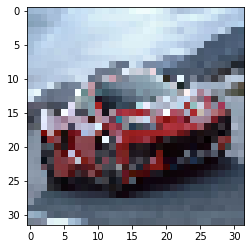

In [144]:
plt.imshow(img2)

In [146]:
class_likelihood = predict[labels_class]
class_label = labels[labels_class]
print("This is image is a {} - likelihood: {:2f}". format(class_label, class_likelihood))

This is image is a car - likelihood: 0.613107
